In [29]:
import pandas as pd #allows us to manipulate data
import matplotlib.pyplot as plt #plot and create visuals
from soccerplots.radar_chart import Radar 

In [30]:
df = pd.read_csv('radars.csv')

In [31]:
df.head()

,Rk,Player,Nation,Pos,Squad,Age,Born,90s,Gls,Sh,...,Dist,FK,PK,PKatt,xG,npxG,npxG/Sh,G-xG,np:G-xG,Matches
0,1,Patrick van Aanholt\Patrick-van-Aanholt,nl NED,DF,Crystal Palace,30-185,1990,13.7,0,15,...,20.6,3,0,0,0.8,0.8,0.05,-0.8,-0.8,Matches
1,2,Tammy Abraham\Tammy-Abraham,eng ENG,FW,Chelsea,23-151,1997,11.3,6,31,...,9.9,0,0,0,5.6,5.6,0.18,0.4,0.4,Matches
2,3,Che Adams\Che-Adams,eng ENG,FW,Southampton,24-232,1996,21.2,4,40,...,13.5,0,0,0,5.3,5.3,0.13,-1.3,-1.3,Matches
3,4,Tosin Adarabioyo\Tosin-Adarabioyo,eng ENG,DF,Fulham,23-159,1997,22.0,0,17,...,9.0,0,0,0,0.9,0.9,0.06,-0.9,-0.9,Matches
4,5,Adrián\Adrian,es ESP,GK,Liverpool,34-058,1987,3.0,0,0,...,NaN,0,0,0,0.0,0.0,NaN,0.0,0.0,Matches


In [32]:
df['Player'] = df['Player'].str.split('\\',expand=True)[0]

In [33]:
df.Player.unique()

array(['Patrick van Aanholt', 'Tammy Abraham', 'Che Adams',
       'Tosin Adarabioyo', 'Adrián', 'Sergio Agüero', 'Ola Aina',
       'Rayan Aït Nouri', 'Semi Ajayi', 'Nathan Aké', 'Marc Albrighton',
       'Thiago Alcántara', 'Toby Alderweireld', 'Rúnar Alex Rúnarsson',
       'Trent Alexander-Arnold', 'Ezgjan Alioski', 'Alisson', 'Allan',
       'Dele Alli', 'Miguel Almirón', 'Marcos Alonso', 'Steven Alzate',
       'Daniel Amartey', 'Ethan Ampadu', 'Joachim Andersen',
       'Elliot Anderson', 'Felipe Anderson', 'Michail Antonio',
       'Alphonse Areola', 'Stuart Armstrong', 'Kepa Arrizabalaga',
       'Pierre-Emerick Aubameyang', 'Serge Aurier', 'Charlie Austin',
       'Jordan Ayew', 'Luke Ayling', 'César Azpilicueta', 'Eric Bailly',
       'Fabián Balbuena', 'George Baldock', 'Gareth Bale',
       'Patrick Bamford', 'Phil Bardsley', 'Ross Barkley',
       'Ashley Barnes', 'Harvey Barnes', 'Kyle Bartley', 'Chris Basham',
       'Michy Batshuayi', 'Jan Bednarek', 'Donny van de Beek

In [34]:
df = df[(df['Player']== 'Mohamed Salah') | (df['Player']== 'Riyad Mahrez')].reset_index() #new dataframe with correct row numbers

In [35]:
df

,index,Rk,Player,Nation,Pos,Squad,Age,Born,90s,Gls,...,Dist,FK,PK,PKatt,xG,npxG,npxG/Sh,G-xG,np:G-xG,Matches
0,272,273,Riyad Mahrez,dz ALG,FW,Manchester City,30-009,1991,15.4,6,...,16.2,1,0,0,3.4,3.4,0.09,2.6,2.6,Matches
1,398,399,Mohamed Salah,eg EGY,FW,Liverpool,28-260,1992,23.4,17,...,16.1,1,6,6,13.7,9.2,0.13,3.3,1.8,Matches


In [36]:
df = df.drop(['index','Rk','Nation','Pos','Squad','Age','Born','90s','FK','PK','PKatt'],axis=1) #dataframe is dropped by column names, axis=1 lets function know to look at column names  (axis=0 is for row names)

In [37]:
df

,Player,Gls,Sh,SoT,SoT%,Sh/90,SoT/90,G/Sh,G/SoT,Dist,xG,npxG,npxG/Sh,G-xG,np:G-xG,Matches
0,Riyad Mahrez,6,38,13,34.2,2.46,0.84,0.16,0.46,16.2,3.4,3.4,0.09,2.6,2.6,Matches
1,Mohamed Salah,17,73,30,41.1,3.13,1.28,0.15,0.37,16.1,13.7,9.2,0.13,3.3,1.8,Matches


In [38]:
df = df.drop(['Matches'],axis=1)

In [39]:
#obtaining the parameters 
params = list(df.columns)
params = params[1:] #filter list created which starts at first location (Gls) till end 
params

['Gls',
 'Sh',
 'SoT',
 'SoT%',
 'Sh/90',
 'SoT/90',
 'G/Sh',
 'G/SoT',
 'Dist',
 'xG',
 'npxG',
 'npxG/Sh',
 'G-xG',
 'np:G-xG']

In [45]:
#creating list of ranges using tuple pairs which cannot be changed 
#initialising lists
ranges = []
avals =[]
bvals =[] 

#loop over parameters list and over dataframe and values to put 
#over list

for x in params:
    a =min(df[params][x]) #min value of param list 
    a = a - (a*0.25) #taking 25% off each value as a min value
    
    b=max(df[params][x])
    b= b + (b*0.25) #adding 25% 
    
    ranges.append((a,b)) #append all ranges into ranges list
    
for x in range(len(df['Player'])): #looping over range of player column
    if df['Player'][x] == 'Mohamed Salah':
        avals= df.iloc[x].values.tolist() #all of salah's row and put it in a list called avals
    if df['Player'][x] == 'Riyad Mahrez':
        bvals = df.iloc[x].values.tolist()

avals  = avals[1:]
bvals  = bvals[1:]

#list that includes both lists

values=[avals,bvals]

In [46]:
values

[[17, 73, 30, 41.1, 3.13, 1.28, 0.15, 0.37, 16.1, 13.7, 9.2, 0.13, 3.3, 1.8],
 [6, 38, 13, 34.2, 2.46, 0.84, 0.16, 0.46, 16.2, 3.4, 3.4, 0.09, 2.6, 2.6]]

findfont: Font family ['Liberation Serif'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Liberation Serif'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Liberation Serif'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Liberation Serif'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Liberation Serif'] not found. Falling back to DejaVu Sans.


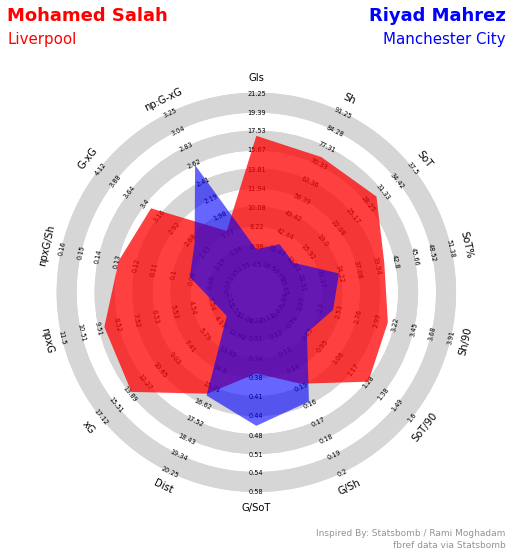

In [54]:
#title 
title= dict(
    title_name='Mohamed Salah',
    title_color= 'red',
    subtitle_name= 'Liverpool',
    subtitle_color='red',
    title_name_2='Riyad Mahrez',
    title_color_2= 'blue',
    subtitle_name_2= 'Manchester City',
    subtitle_color_2='blue',
    title_fontsize = 18,
    subtitle_fontsize = 15)

endnote= 'fbref data via Statsbomb'
radar = Radar()

fig,ax = radar.plot_radar(ranges=ranges,params=params,values=values,
                         radar_color=['red','blue'],
                          alphas=[.75,.6],title=title,endnote=endnote,
                         compare=True)

SyntaxError: invalid syntax (3985383711.py, line 4)